# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [316]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [317]:
# Create two new dataframes
df1 = pd.read_csv("NorthCallCenter.csv")
df1

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [318]:
df2 = pd.read_csv("SouthCallCenter.csv")
df2

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  
> There are 9 Reps in the North branch.

In [319]:
#Code Used:
#Filter the data to only include the North branch
north_df = df1[df1["Branch"]== "North"]


#count the number of unique representatives IDs in the North Branch
num_reps = len(north_df["Rep ID"].unique())
print(f"There are {num_reps} reps in the North branch.")

There are 9 reps in the North branch.


#### EDA Question 1B:  How many reps are in the South branch? 
> There are 11 Reps in the South branch.

In [320]:
#Code Used:
#Filter the data to only include the North branch
south_df = df2[df2["Branch"]== "South"]


#count the number of unique representatives IDs in the North Branch
num_reps = len(south_df["Rep ID"].unique())
print(f"There are {num_reps} reps in the South branch.")

There are 11 reps in the South branch.


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 
> Average Busy Minutes: 9.99
> Average Not Ready Minutes: 1.91
> Average Incoming Wait Time: 3.05
> Average During Call Wait Time: 2.97

In [321]:
#Code Used:

# Calculate the mean of the Busy Minutes, Not Ready Minutes, Incoming Wait Time, and During Call Wait Time columns
busy_minutes = north_df["Busy Minutes"].mean()
not_ready_minutes = north_df["Not Ready Minutes"].mean()
incoming_wait_time = north_df["Incoming Wait Time"].mean()
during_call_wait_time = north_df["During Call Wait Time"].mean()
#B = north_df.groupby(["Branch","Busy Minutes"]).mean()
#print(B)


# printing the means for north_df
print(f"Average Busy Minutes: {busy_minutes:.2f}")
print(f"Average Not Ready Minutes: {not_ready_minutes:.2f}")
print(f"Average Incoming Wait Time: {incoming_wait_time:.2f}")
print(f"Average During Call Wait Time: {during_call_wait_time:.2f}")

Average Busy Minutes: 9.99
Average Not Ready Minutes: 1.91
Average Incoming Wait Time: 3.05
Average During Call Wait Time: 2.97


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 
> Average Busy Minutes: 10.05
> Average Not Ready Minutes: 1.91
> Average Incoming Wait Time: 3.00
> Average During Call Wait Time: 3.08

In [322]:
#Code Used:

# Calculate the mean of the Busy Minutes, Not Ready Minutes, Incoming Wait Time, and During Call Wait Time columns
busy_minutes = south_df["Busy Minutes"].mean()
not_ready_minutes = south_df["Not Ready Minutes"].mean()
incoming_wait_time = south_df["Incoming Wait Time"].mean()
during_call_wait_time = south_df["During Call Wait Time"].mean()


# printing the means for south_df
print(f"Average Busy Minutes: {busy_minutes:.2f}")
print(f"Average Not Ready Minutes: {not_ready_minutes:.2f}")
print(f"Average Incoming Wait Time: {incoming_wait_time:.2f}")
print(f"Average During Call Wait Time: {during_call_wait_time:.2f}")

Average Busy Minutes: 10.05
Average Not Ready Minutes: 1.91
Average Incoming Wait Time: 3.00
Average During Call Wait Time: 3.08


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?
> Branch     Time Block
  Combined   10:00 AM  -   99    
             11:00 AM  -   56
             12:00 PM  -  120
              1:00 PM  -   40
              2:00 PM  -   65
              3:00 PM  -   73
              4:00 PM  -   53
              5:00 PM  -   43
              9:00 PM  -   10

In [323]:
# Code Used:
# Read in the data
combined_df = pd.concat([df1, df2], ignore_index=True)
# Group the data by Time Block and sum the Calls column
calls_by_time_block = combined_df.groupby(["Time Block"])["Calls"].sum()
#calls_by_time_block = combined_df.groupby(["Branch","Time Block"])["Calls"].sum()

print(calls_by_time_block)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Yes there is missing data in North Call Center & South Call Center for "Incoming Wait time"(163+188 = 351 rows), we have 245+314 = 559 rows in total out of 559  rows we have 351 rows missing values.

In [324]:
north_df.shape

(245, 15)

In [325]:
north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [326]:
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [327]:
south_df.shape

(314, 15)

In [328]:
south_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [329]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: In North data set it shows the value "YES", one 'YES ' is with space & one 'YES' is without space.
I have replaced the "YES"==>('YES ' to 'YES')

In [330]:
#Code Used
# Add Additional Cells as needed.
import pandas as pd
# Load the North dataset
df1 = pd.read_csv("NorthCallCenter.csv")
df1["Sale"].unique()



array(['NO', 'YES ', 'YES'], dtype=object)

In [331]:
# Replace "YES  with "YES" in the "Sale" column

df1["Sale"] = df1["Sale"].replace({"YES ":"YES"})
df1.head(60)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicated columns, if so i would've dropped that columns.

In [332]:
north_df.duplicated().sum()

0

In [333]:
south_df.duplicated().sum()

0

In [334]:
combined_df.duplicated().sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Yes, I found there is no details in Lost Call from two data sets and it seems unnecessary to me.
> I have dropped that column from the two data sets.
> But in real time work we may not delete all the columns even its unnecessary, because it may need at any time in future.

In [335]:
#Code Used
# Add Additional Cells as needed.
# # Drop unnecessary column
combined_df.drop(columns=["Lost Call"])

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,10,1,NaN,2,1


In [336]:
combined_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [337]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], ignore_index=True)
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, highest number of total calls - 37
- South Branch = Eric, highest number of total calls - 35


In [338]:
# Code Used
# Add Additional Cells as needed.
# Group the data by Time Block and sum the Calls column
calls_by_rep_id = north_df.groupby(["Branch","Rep ID"])["Calls"].sum().sort_values()
max_calls_rep_id = calls_by_rep_id.idxmax()
total_calls = calls_by_rep_id.loc[max_calls_rep_id]

print("Rep with the highest number of North Call Center Calls:", max_calls_rep_id)
print("Total calls:", total_calls)
print(calls_by_rep_id)

Rep with the highest number of North Call Center Calls: ('North', 'Brent')
Total calls: 37
Branch  Rep ID
North   Amanda    23
        Andy      23
        Cam       24
        Xander    24
        Joe       26
        Duke      29
        Todd      29
        Lilly     30
        Brent     37
Name: Calls, dtype: int64


In [339]:
# Group the data by Time Block and sum the Calls column
calls_by_rep_id = south_df.groupby(["Branch","Rep ID"])["Calls"].sum().sort_values()
max_calls_rep_id = calls_by_rep_id.idxmax()
total_calls = calls_by_rep_id.loc[max_calls_rep_id]

print("Rep with the highest number of South Call Center Calls:", max_calls_rep_id)
print("Total calls:", total_calls)
print(calls_by_rep_id)

Rep with the highest number of South Call Center Calls: ('South', 'Eric')
Total calls: 35
Branch  Rep ID
South   Alice     20
        Sharon    25
        Josh      26
        Susan     26
        Karl      28
        George    29
        Kate      29
        Helga     31
        Sandy     32
        Randy     33
        Eric      35
Name: Calls, dtype: int64


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch : 2.86%
- South Branch : 1.27%
- Company Wide : 1.97%
- Do any of these fall out of the optimal range of 2-5%? = Yes

In [340]:
# Code Used
# Add Additional Cells as needed.
# Calculate the call abandonment rate for each branch
# == "Yes"]["Abandoned"]
north_abandoned_calls = np.mean(north_df["Abandoned"])
south_abandoned_calls = np.mean(south_df["Abandoned"])
company_wide_abandoned_calls = np.mean(df["Abandoned"])


print(f"{'North Abandoned Calls : '}{round(north_abandoned_calls*100,2)}%")
print(f"{'South Abandoned Calls : '}{round(south_abandoned_calls*100,2)}%")
print(f"{'Total Abandoned Calls : '}{round(company_wide_abandoned_calls*100,2)}%")

North Abandoned Calls : 2.86%
South Abandoned Calls : 1.27%
Total Abandoned Calls : 1.97%


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33  calls within 2 seconds
- South Branch = 38.10%, 48  calls within 2 seconds
- Company Wide = 38.94%, 81  calls within 2 seconds

In [341]:
#Calculate the total number of calls answered within 2 seconds for each branch and the company wide
calls_within_2sec = df[df["Incoming Wait Time"] <= 2]
calls_by_branch_within_2sec = calls_within_2sec.groupby("Branch")["Calls"].sum()
total_calls_within_2sec = calls_within_2sec["Calls"].sum()
print(calls_by_branch_within_2sec)
print("Company Wide :", total_calls_within_2sec)

Branch
North    33
South    48
Name: Calls, dtype: int64
Company Wide : 81


In [342]:
# Calculate the percentage of calls answered within 2 seconds for North branch
north_branch = calls_within_2sec[calls_within_2sec["Branch"] == 'North']
total_calls_north = df[df["Branch"] == 'North']
percentage_north= north_branch["Calls"].sum() / (total_calls_north["Incoming or Outgoing"] == "Incoming").sum() * 100
print("Percentage of calls answered within 2 seconds by North Branch: {:.2f}%".format(percentage_north))
#print("Percentage of calls answered within 2 seconds by North Branch: {:.2f}%".format(percentage_north1)) 

Percentage of calls answered within 2 seconds by North Branch: 40.24%


In [343]:
# Calculate the percentage of calls answered within 2 seconds for South branch
South_branch = calls_within_2sec[calls_within_2sec["Branch"] == 'South']
total_calls_south = df[df["Branch"] == 'South']
percentage_south= South_branch["Calls"].sum() / (total_calls_south["Incoming or Outgoing"] == "Incoming").sum() * 100
print("Percentage of calls answered within 2 seconds by South Branch: {:.2f}%".format(percentage_south))

Percentage of calls answered within 2 seconds by South Branch: 38.10%


In [344]:
# Calculate the percentage of calls answered within 2 seconds for Company Wide

company_wide= calls_within_2sec["Calls"].sum() / (df["Incoming or Outgoing"] == "Incoming").sum() * 100
print("Percentage of calls answered within 2 seconds by Company Wide: {:.2f}%".format(company_wide))

Percentage of calls answered within 2 seconds by Company Wide: 38.94%


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02


In [345]:
# Calculate the duration of each call in seconds

# Calculate average speed of answer for each branch and company wide
avg_speed_by_north_branch = df[df["Branch"] == 'North']
avg_speed_by_south_branch = df[df["Branch"] == 'South']

avg_speed_of_answer_north = avg_speed_by_north_branch["Incoming Wait Time"].mean()
avg_speed_of_answer_south = avg_speed_by_south_branch["Incoming Wait Time"].mean()
avg_speed_company_wide = df["Incoming Wait Time"].mean()

# Print the results
print("Average Speed of Answer by North Branch: {:.2f}".format(avg_speed_of_answer_north))
print("Average Speed of Answer by South Branch: {:.2f}".format(avg_speed_of_answer_south))
print("Average Speed of Answer for Company Wide: {:.2f}".format(avg_speed_company_wide))

Average Speed of Answer by North Branch: 3.05
Average Speed of Answer by South Branch: 3.00
Average Speed of Answer for Company Wide: 3.02


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:
Queue
{'A': 0.0417, 'B': 0.0201, 'C': 0.0072, 'D': 0.017}

> Chart style you chose and why: I coose the Vertical Bar Chart, b.coz it's easy for me to visualize to show the average abandoned rate per queue.

In [346]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
     abandonment_rates[queues[i]] = round(queue_dict["Abandoned"][i] / queue_dict["Calls"][i],4)
     
print(abandonment_rates)

#Your Code Here:
df.groupby("Queue").sum()["Abandoned"] / df.groupby("Queue").sum()["Calls"]

{'A': 0.0417, 'B': 0.0201, 'C': 0.0072, 'D': 0.017}


Queue
A    0.041667
B    0.020134
C    0.007246
D    0.017045
dtype: float64

dict_keys(['A', 'B', 'C', 'D'])
dict_values([0.0417, 0.0201, 0.0072, 0.017])


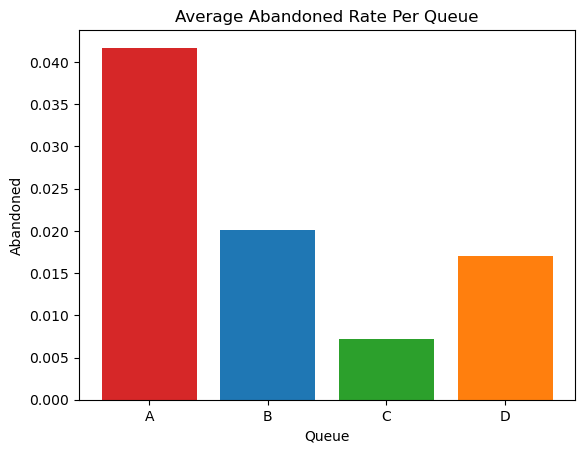

In [347]:
#create vertical bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

queue = abandonment_rates.keys()
abandoned = abandonment_rates.values()
print(queue)
print(abandoned)

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
bar_labels = ['Queue 1', 'Queue 2', 'Queue 3', 'Queue 4']
ax.bar(queue, abandoned, label=bar_labels, color=bar_colors)
ax.set_ylabel('Abandoned')
ax.set_xlabel('Queue')
ax.set_title('Average Abandoned Rate Per Queue', color = 'black', fontsize = 12)
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

North_Branch-Calls_x  Calls_y  Service Level %
Rep ID                                   
Amanda        3        5             60.0
Andy          3       10             30.0
Brent         6        8             75.0
Cam           5       11             45.0
Duke          6       14             43.0
Joe           2       10             20.0
Lilly         4       12             33.0
Todd          2        6             33.0
Xander        2        6             33.0%


> Chart style you chose and why: I choose the grouped bar chart to show percentage of service level, avg. speed of answer for each rep in Northern Branch.

In [360]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
#print(north_plt)

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
#print(quick_stats)


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID").reset_index()
#print(service_level)

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
print(f"{round(service_level)}%")
#print(north_df.columns)

   Rep ID  Calls_x  Calls_y  Service Level %
0  Amanda        3        5             60.0
1    Andy        3       10             30.0
2   Brent        6        8             75.0
3     Cam        5       11             45.0
4    Duke        6       14             43.0
5     Joe        2       10             20.0
6   Lilly        4       12             33.0
7    Todd        2        6             33.0
8  Xander        2        6             33.0%


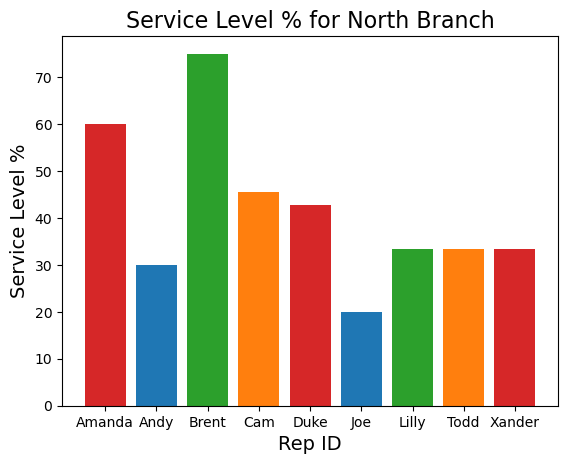

In [358]:
#create vertical bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

service_level_percentage = north_df["Queue"] == "Service Level %"
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
bar_labels = "Service Level %"
ax.bar(service_level["Rep ID"], service_level["Service Level %"], label=bar_labels, color=bar_colors)
ax.set_ylabel("Service Level %", fontsize=14)
ax.set_xlabel("Rep ID", fontsize=14)
ax.set_title("Service Level % for North Branch", fontsize=16, color='black')
plt.show()

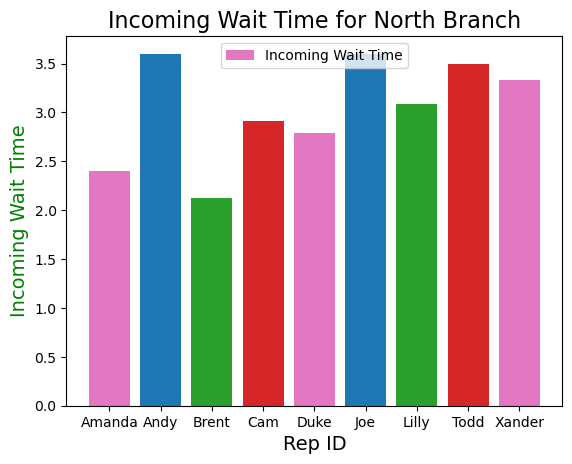

In [380]:
#create vertical bar chart
import matplotlib.pyplot as plt

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

fig, ax = plt.subplots()

incoming_wait_time = north_df["Queue"] == "Incoming"
bar_colors = ['tab:pink', 'tab:blue', 'tab:green', 'tab:red']
bar_label = "Incoming Wait Time"
ax.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"], label=bar_labels, color=bar_colors)
ax.set_ylabel("Incoming Wait Time", fontsize=14, color = 'green')
ax.set_xlabel("Rep ID", fontsize=14)
ax.set_title("Incoming Wait Time for North Branch", fontsize=16, color='black')
ax.legend(["Incoming Wait Time"], fontsize=12)
ax.legend(loc="upper center")
plt.show()

## Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75

> Chart style you chose and why: I choose the Stacked bar chart to show the call purpose, incoming or outgoing by the call purpose.

In [383]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()




Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


{'Incoming': 51}
{'Outgoing': 123, 'Incoming': 75}
{'Outgoing': 228, 'Incoming': 82}


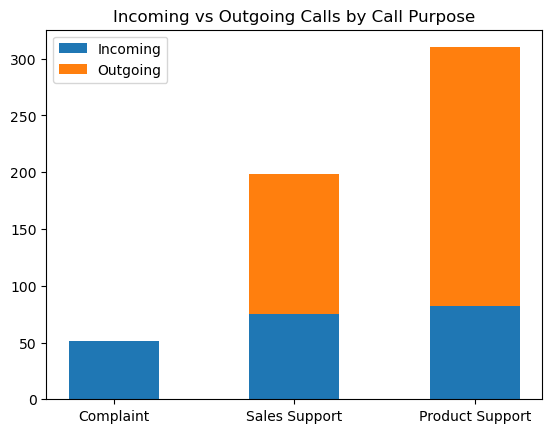

In [384]:
#Your Code Here:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

call_purpose = ["Complaint", "Sales Support", "Product Support"]
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()
print(complaints)
print(sales_support)
print(product_support)


weight_counts = {
    "Incoming": np.array([int(complaints.get('Incoming')), int(sales_support.get('Incoming')), int(product_support.get('Incoming'))]),
    "Outgoing": np.array([0, int(sales_support.get('Outgoing')), int(product_support.get('Outgoing'))])

}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(call_purpose, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Incoming vs Outgoing Calls by Call Purpose")
ax.legend(loc="upper left")

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
North Abandoned Calls : 3%
South Abandoned Calls : 1%
Total Abandoned Calls : 2%

>Queue
A    0.041667 - North
B    0.020134 - North
C    0.007246 - South
D    0.017045 - South

>Avg. Speed of Answer
Average Speed of Answer by North Branch: 3.05
Average Speed of Answer by South Branch: 3.00
Average Speed of Answer for Company Wide: 3.02



>To my opinion based on average abandonment rate ==> South Branch, Service Level ==> North Branch & Average Speed of Answer ==> South Branch.
>Even though South Branch is satisfying the customers with abandonment rate & average speed of answer, I choose North Branch for  satisfying the customers with service level.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 
>Avg. Speed of Answer
Average Speed of Answer by North Branch: 3.05
Average Speed of Answer by South Branch: 3.00
Average Speed of Answer for Company Wide: 3.02

> To my opinion based on avg. speed of answer South Branch is working quick, they have already 11 reps & North Branch would benefit from extra help b.coz they have only 9 reps.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: It would be better if we have abandonment calls reason.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]


#Select the call purpose to plot

# Use groupby to plot based on time blocks:


# Use groupby and get_group to select which call purpose to plot:
